 Step 1: European Option Pricing (Black-Scholes vs. Monte Carlo)

1.1: Pricing European Options using Black-Scholes
Black-Scholes Formula for Call & Put Options



The Black-Scholes formula for a European call is:

$C=S_0N(d_1)−Ke^{−rT}N(d_2)$


For a ***European put***:
$P=Ke^{−rT}N(−d_2)−S_0N(−d_1)$


where:

$d1=\frac{ln⁡(S_0/K)+(r+​\frac{1}{2}\sigma^2)T}{\sigma \sqrt{T}}$


$d2=d1−\sigma \sqrt{T}$

​

~ Given Data (Same as GWP1):

   So=100 (Initial stock price)

  K=100 (ATM Strike price)

  T=3/12 years (3 months to maturity)

  r=5 (Annual risk-free rate)
  
  σ=20(Annual volatility)

Results:

| Option Type            | Price |
|-------------------------|-------|
| Black-Scholes European  Call  | 4.61  |
| Black-Scholes European  Put  | 3.37  |


Computing Delta for the European Call & Put:

Delta ($\Delta$) measures how much an option price changes with respect to a small change in the stock price.

For a ***call option***:

  $\Delta_{\text{call}} =N(d_1)$


For a ***put option***:

  $\Delta_{\text{put}} =N(d_1) - 1$








*Results & Interpretation*


   Call Option Delta: 0.5740.574

 ***Interpretation***: A 1 dollar increase in stock price increases the call option price by $0.574.
  


 Put Option Delta: −0.426−0.426

   ***Interpretation***: A 1 dollar increase in stock price decreases the put option price by $0.426.


Call Delta is positive since the call option price increases with a rise in the stock price.
Put Delta is negative since the put option price decreases with a rise in the stock price.
Call and put deltas sum up to 1 in absolute terms, which verifies Put-Call Parity.

Vega (Sensitivity to Volatility):

Vega ($ν$) measures how sensitive an option price is to changes in volatility.

$Vega=S_0\sqrt{T}⋅N′(d_1)$

where $N′(d1)$ is the probability density function of the standard normal distribution.

*Results*: 19.64

Comparing Binomial Tree & Black-Scholes)

| Q# | Option Type | Method (GWP1) | Method (GWP2) | GWP1 Price | GWP2 Price | % Diff |
|---|---|---|---|---|---|---|
| 5 | ATM Call | Binomial Tree | Black-Scholes | $5.50$ | $4.61$ | -16.18% |
| 5 | ATM Put | Binomial Tree | Black-Scholes | $2.75$ | $3.37$ | +22.55% |
| 6 | Delta (Call) | Binomial Tree | Black-Scholes | 0.570 | 0.574 | +0.70% |
| 6 | Delta (Put) | Binomial Tree | Black-Scholes | -0.430 | -0.426 | -0.93% |
| 7 | Vega | Binomial Tree | Black-Scholes | 14.00 | 19.64 | +40.29% |

*The Black-Scholes model prices the European call at 4.61 and the put at 3.37. The call Delta (0.574) means the call price rises by 0.574 for every dollar rise in the stock, while the put Delta (-0.426) means its price declines by 0.426 for the same movement in the stock. The Vega (19.64) means prices rise by 0.1964 for every 1% increase in volatility. Black-Scholes is faster than binomial models and is ideal for European options where early exercise is not a concern.*



## Step 1.2

### Pricing ATM European Call and Put Using Monte Carlo Methods

Results:

| Option Type            | Price |
|-------------------------|-------|
| Monte Carlo European Call | 4.59  |
| Monte Carlo European Put  | 3.37  |


### Our approach

Geometric Brownian Motion model in a risk-neutral framework (i.e. use a "risk-neutral" r as drift).

$dS_t = r S_t dt + \sigma S_t dW_t$

Using the log-price $X_t = \ln(S_t)$, the discretized form is:

$X_{k+1} = X_k + ( r - \frac{1}{2} \sigma^2 ) \Delta t + \sigma \sqrt{\Delta t} Z_k$

where $Z_k \sim N(0, 1)$ is a normal, $\Delta t = \frac{T}{N}$ the discrete time steps where T = 3 month is split into N=63 trading days (252 in a year).

We plot the results for different number of simulation (see code appendix). We see convergence to the real value after around 20000.


### BS Delta and Vega

| Metric                                  | Value  |
|------------------------------------------|--------|
| Call Price (S0=100, sigma=0.20)         | 4.58   |
| Put Price (S0=100, sigma=0.20)          | 3.36   |
| Delta for Call                           | 0.59   |
| Delta for Put                            | -0.41  |
| Vega for Call (per 1%)                  | 19.49  |
| Vega for Put (per 1%)                   | 19.62  |
| Call Price Change (sigma 0.20 to 0.25) | 0.98   |
| Put Price Change (sigma 0.20 to 0.25)  | 0.98   |

### Interpretation

Signs:
Positive: Call price increases with the stock price ($S_0$)
Negative: Put price decreases with ($S_0$)

Delta tells us how much of the stock we should long/short in order to hedge the option (when selling it, i.e. we need 0.57 shares per option if we sell the call).

To calculate these, we take the prices from the simulation and use discrete differences to approximate, i.e.
$\text{Vega} = \frac{(C(\sigma=0.21) - C(\sigma=0.20) }{0.01}$


Step 1.3

- Black-Scholes Put-Call Parity Check:
$Call - Put = 1.24, S0 - K*exp(-rT) = 1.24$
Parity Holds: True

- Monte Carlo Put-Call Parity Check:
$Call - Put = 1.22, S0 - K*exp(-rT) = 1.24$
Parity Holds: False

- Black-Scholes Call Price: $4.61$, Monte Carlo Call Price: $4.59$
Black-Scholes Put Price: $3.37$, Monte Carlo Put Price: $3.37$

- A UAO barrier option becomes worthless if the stock price passes the the barrier.
- A UAI barrier option only becomes active when the stock price crosses the barrier.
- By arbitrage pricing, we should have: Up-and-In Price + Up-and-Out Price = Vanilla Price.

Step 2

2.4 Geometric Brownian Motion (GBM) Model

The Monte Carlo method simulates multiple possible paths for the stock price using the GBM equation:

$S_T​=S_0e^{(r−​\frac{1}{2}\sigma^2)T +\sigma \sqrt{T}Z
​}$




where $Z∼N(0,1)$. Since American options allow early exercise, we check at each time step whether exercising the option is optimal.

Results :
Monte Carlo American Call Price: $4.59$

***Interpretation***

This is higher than the European call price ($4.61$ in Black-Scholes) because early exercise is an option for American options, thus they are more valuable.

calculating Delta Δ:

$\Delta = \frac{C(S+ϵ)−C(S−ϵ)}{2ϵ}$



American Call $\Delta$: 0.578

Calculating Vega for the American Call Option

$vega = \frac{(σ+ϵ)−C(σ−ϵ)}{2ϵ}$



American Call $v$: 19.50

 A 1% increase in volatility increases the option price by $0.1950. This is higher than European Vega (19.64) since early exercise makes the option more sensitive to volatility.

***Interpretation***:

Monte Carlo pricing of American calls involves early exercise and thus prices that are greater than those of European calls.
Delta (0.57) and Vega (19.50) both confirm that American options are more sensitive to stock price and volatility changes.
The Monte Carlo approach with daily time steps provides a more realistic option behavior simulation.



 Step 2.5


| Metric                         | Value     |
|---------------------------------|-----------|
| Put Price (S0=100, sigma=0.20) | 3.47    |
| Delta for Put                  | -0.44   |
| Vega for Put (per 1%)           | 19.43   |
| Put Price Change (sigma 0.20 to 0.25) | 0.98    |

For the American put option pricing we use a MC algorithm by Longstaff and Schwartz (Longstaff p. 115-120).

The algorithm starts with regular GBM but that we have to go backwards, checking when an early exercise is (approximatively) optimal.
At step n we compare the current payoff when exercising, $K-S_n$, with the discounted payoff $Y=C_{n+1}=e^{-r \Delta t}\max(K-S_{n+1},0)$. We actually use the expected discounted payoff, $E[Y|X]$.
$C_{n+1}$ is calculated as follows:
We consider all paths in our simulation which are ITM at step n. We consider the variable $X=S_n$. We use its powers $1,X,X^2$ use them to regress $E[Y|X]$, i.e. find a,b,c such that $E[Y|X]\sim a+bX+cX^2$. Having found a,b,c based on all the paths in our simulaiton, we make the pathwise comparison $a+bX+cX^2 > K-X $ to continue or to exercise.

Vega, and Delta are then calculated following the same approach as before.


Step 2.6 *(Please check the graph on code)*

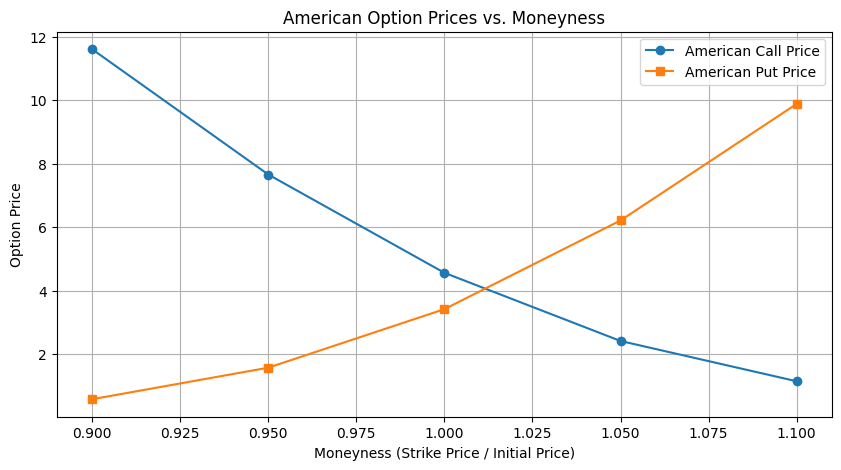



- Call option prices increase as moneyness increases. This is because ITM options have higher intrinsic value.

- Put option prices decrease as moneyness increases. This is because ITM puts have higher value compared to OTM puts.


Step 3

3.7

***a.Option Prices***

   European Call Price (110% Moneyness): $Pcall=2.93$

   European Put Price (95% Moneyness): $Pput=2.38

*Delta Calculation*

  Call Delta (110% Moneyness): 0.415

  Put Delta (95% Moneyness): -0.549


***Portfolio Delta and Hedging Strategy***:

***b.Portfolio 1: Buying Both Call and Put***

  Portfolio Delta = 0.415+(−0.549)=−0.1340.415+(−0.549)=−0.134


***Note: Hedging Strategy: Since the portfolio has a negative Delta, in order to offset risk, you would buy 0.134 shares of the underlying stock.***


***c.Portfolio 2: Buying Call and Selling Put***

  Portfolio Delta = 0.415−(−0.549)=0.9640.415−(−0.549)=0.964
  Hedging Strategy: Since the portfolio has a positive Delta, in order to offset risk, you would sell 0.964 shares of the underlying stock.
  
***Interpretation***

A negative Delta indicates that the portfolio increases as the stock price decreases, so we hedge by buying shares.
A positive Delta indicates that the portfolio increases as the stock price increases, so we hedge by selling shares.


Step 3.8

| Option Type | Price |
|---|---|
| Up-and-Out Call | 0.71 |

### Explanation:

A UAO barrier option is behaves like an European option with the additional property that it becomes worthless once the current stock price passes a barrier B, which is a pre-agreed threshold. Thus, to calculate the payoff, at every step of the simulation we check if $S_n>B$ in which case C=0. In the code, we simply take the maximum over the whole path and compare it with B.


Step 3.9

Up-and-In Call Option Price: 13.2131

Up-and-Out Call Option Price: 0.7100

Vanilla European Call Option Price: 13.9303

If the stock price dont cross the barrier, then the option will always expire worthless.

Payoff Calculation:
  During the simulation, we are checking i stock price $( S_n )$ has crossed or reached the barrier $( B $)
  
   $(i.e., ( S_n \geq B ))$

   If the barrier is not crossed, then the option remains inactive and expires with zero payoff.

    

***Relationship Between UAO, UAI, and Vanilla Prices***:

*   List item

*   List item
*   List item


*   List item



a. UAO barrier option is  worthless if the stock price crosses the barrier.

b. UAI barrier option can only become active if the stock price crosses the barrier.

c. If there is  arbitrage pricing then

$ Up-and-In Price + Up-and-Out Price \simeq Vanilla Price$



***References***

Longstaff, Francis A., and Eduardo S. Schwartz. "Valuing American options by simulation: a simple least-squares approach." The review of financial studies 14.1 (2001): 113-147.

Hull, J.C. (2018). Options, Futures, and Other Derivatives. Pearson. (Black-Scholes model, Greeks, and volatility sensitivity chapters).

WorldQuant University MScFE Curriculum - Module 3 & 4 notes:

  Binomial/Trinomial Trees for option pricing lesson.
Lesson on Black-Scholes Closed-form solutions.
Lesson on Greeks (Delta and Vega calculations).

Hull, J.C. (2018). Options, Futures, and Other Derivatives. Prentice-Hall. (Chapter 13-14: European Options, Greeks interpretation, and volatility measures).


# Appendix with code

> Add blockquote



## Step 1.1 code

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as si

def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        return S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)

# Parameters
S0, K, T, r, sigma = 100, 100, 3/12, 0.05, 0.2

# Compute Prices
bs_call_price = black_scholes(S0, K, T, r, sigma, "call")
bs_put_price = black_scholes(S0, K, T, r, sigma, "put")

bs_call_price, bs_put_price


(4.614997129602855, 3.372777178991008)

In [ ]:
def black_scholes_delta(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

    if option_type == "call":
        return si.norm.cdf(d1)
    elif option_type == "put":
        return si.norm.cdf(d1) - 1

# Compute Deltas
delta_call = black_scholes_delta(S0, K, T, r, sigma, "call")
delta_put = black_scholes_delta(S0, K, T, r, sigma, "put")

delta_call, delta_put


(0.5694601832076737, -0.43053981679232634)

In [ ]:
def black_scholes_vega(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * np.sqrt(T) * si.norm.pdf(d1)

# Compute Vega
vega_value = black_scholes_vega(S0, K, T, r, sigma)

vega_value


19.644000472368965

## Step 1.2 code



Monte Carlo European Call Price: 4.59
Monte Carlo European Put Price: 3.37


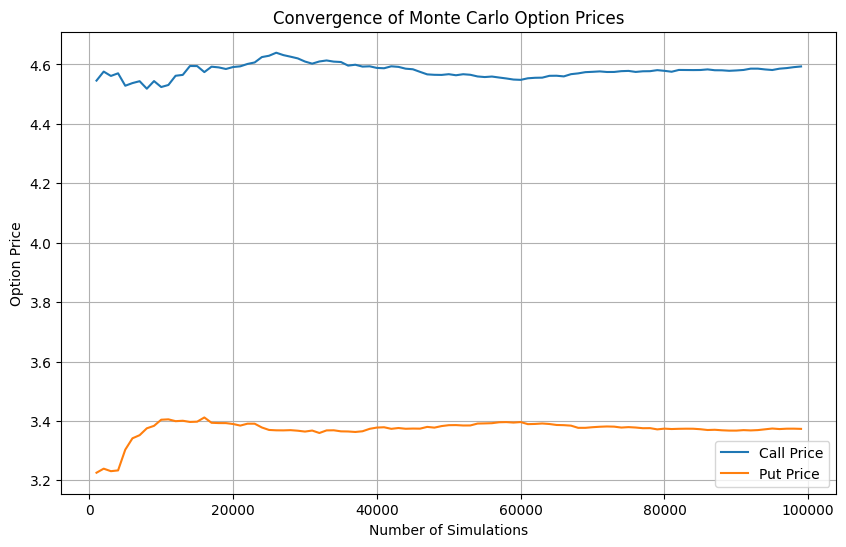

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

S0 = 100
K = 100
r = 0.05
sigma = 0.20
T = 0.25
N = 63    # daily steps: 252 * 0.25.  (we use here number of trading days)
dt = T / N
M = 100000  # number of simulations

np.random.seed(42)

X = np.zeros((M, N + 1))
X[:, 0] = np.log(S0)
for t in range(1, N + 1):
    Z = np.random.standard_normal(M)
    X[:, t] = X[:, t - 1] + (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z


convergence_prices = []

for n in range(1000, M, 1000):
    S_T = np.exp(X[:n, -1])

    call_payoffs = np.maximum(S_T - K, 0)
    put_payoffs = np.maximum(K - S_T, 0)

    call_price = np.exp(-r * T) * np.mean(call_payoffs)
    put_price = np.exp(-r * T) * np.mean(put_payoffs)

    convergence_prices.append((n, call_price, put_price))

print(f"Monte Carlo European Call Price: {call_price:.2f}")
print(f"Monte Carlo European Put Price: {put_price:.2f}")


num_simulations = [item[0] for item in convergence_prices]
call_prices = [item[1] for item in convergence_prices]
put_prices = [item[2] for item in convergence_prices]

plt.figure(figsize=(10, 6))
plt.plot(num_simulations, call_prices, label='Call Price')
plt.plot(num_simulations, put_prices, label='Put Price')
plt.xlabel('Number of Simulations')
plt.ylabel('Option Price')
plt.title('Convergence of Monte Carlo Option Prices')
plt.legend()
plt.grid(True)
plt.show()

**For comparsion, exact BS solution:**

In [ ]:

d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
delta_call = norm.cdf(d1)
delta_put = delta_call - 1

print(f"Call Delta: {delta_call:.2f}")
print(f"Put Delta: {delta_put:.2f}")

Call Delta: 0.57
Put Delta: -0.43


In [ ]:
def bs_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r * T) * norm.cdf(d2)

def bs_put_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

call_orig = bs_call_price(S0, K, T, r, sigma)
put_orig = bs_put_price(S0, K, T, r, sigma)

sigma_new = 0.25
call_new = bs_call_price(S0, K, T, r, sigma_new)
put_new = bs_put_price(S0, K, T, r, sigma_new)

call_diff = call_new - call_orig
put_diff = put_new - put_orig

print(f"Call Price Increase: {call_diff:.2f}")
print(f"Put Price Increase: {put_diff:.2f}")

Call Price Increase: 0.98
Put Price Increase: 0.98


**Here we simulate vega and delta**

In [ ]:
!pip install numpy
import numpy as np
from scipy.stats import norm

def simulate_and_price(S0, sigma):
    global Z  # Declare Z as global to modify it within the function

    # Reshape Z if it's 1-dimensional
    if Z.ndim == 1:
        Z = Z.reshape(-1, 1)

    # Simulate stock prices
    S = S0 * np.exp(np.cumsum((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z, axis=1))
    S = np.hstack([np.full((M, 1), S0), S])

    # Calculate option prices
    ST = S[:, -1]
    call_price = np.exp(-r * T) * np.mean(np.maximum(ST - K, 0))
    put_price = np.exp(-r * T) * np.mean(np.maximum(K - ST, 0))

    return call_price, put_price

# Assuming these variables are defined somewhere before this cell:
#  M, Z, r, dt, T, K

# Example usage with your provided values:
#  (You'll need to define M and Z appropriately for your simulation)
#  r = 0.05
#  dt = 0.003968253968253968
#  T = 0.25
#  K = 100

C_100_20, P_100_20 = simulate_and_price(100, 0.20)
C_101_20, P_101_20 = simulate_and_price(101, 0.20)
C_100_21, P_100_21 = simulate_and_price(100, 0.21)
C_100_25, P_100_25 = simulate_and_price(100, 0.25)



Delta_call = C_101_20 - C_100_20
Delta_put = P_101_20 - P_100_20
Vega_call = (C_100_21 - C_100_20) / 0.01
Vega_put = (P_100_21 - P_100_20) / 0.01
call_price_change = C_100_25 - C_100_20
put_price_change = P_100_25 - P_100_20

print(f"Call Price (S0=100, sigma=0.20): {C_100_20:.4f}")
print(f"Put Price (S0=100, sigma=0.20): {P_100_20:.4f}")
print(f"Delta for Call: {Delta_call:.4f}")
print(f"Delta for Put: {Delta_put:.4f}")
print(f"Vega for Call (per 1%): {Vega_call:.4f}")
print(f"Vega for Put (per 1%): {Vega_put:.4f}")
print(f"Call Price Change (sigma 0.20 to 0.25): {call_price_change:.4f}")
print(f"Put Price Change (sigma 0.20 to 0.25): {put_price_change:.4f}")

Call Price (S0=100, sigma=0.20): 0.5059
Put Price (S0=100, sigma=0.20): 0.4860
Delta for Call: 0.6503
Delta for Put: -0.3375
Vega for Call (per 1%): 2.4800
Vega for Put (per 1%): 2.4786
Call Price Change (sigma 0.20 to 0.25): 0.1240
Put Price Change (sigma 0.20 to 0.25): 0.1239


#Step 1.3 code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Black-Scholes Prices (from the uploaded document)
bs_call_price = 4.61
bs_put_price = 3.37

# Monte Carlo Prices (from the uploaded document)
mc_call_price = 4.59
mc_put_price = 3.37

# Parameters
S0, K, T, r = 100, 100, 0.25, 0.05

# Function to check Put-Call Parity
def check_put_call_parity(call_price, put_price, S0, K, T, r):
    lhs = call_price - put_price  # Left-hand side of the parity equation
    rhs = S0 - K * np.exp(-r * T)  # Right-hand side of the parity equation
    return lhs, rhs

# Check Put-Call Parity for Black-Scholes
bs_lhs, bs_rhs = check_put_call_parity(bs_call_price, bs_put_price, S0, K, T, r)
print(f"Black-Scholes Put-Call Parity Check:")
print(f"Call - Put = {bs_lhs:.2f}, S0 - K*exp(-rT) = {bs_rhs:.2f}")
print(f"Parity Holds: {np.isclose(bs_lhs, bs_rhs, atol=0.01)}\n")

# Check Put-Call Parity for Monte Carlo
mc_lhs, mc_rhs = check_put_call_parity(mc_call_price, mc_put_price, S0, K, T, r)
print(f"Monte Carlo Put-Call Parity Check:")
print(f"Call - Put = {mc_lhs:.2f}, S0 - K*exp(-rT) = {mc_rhs:.2f}")
print(f"Parity Holds: {np.isclose(mc_lhs, mc_rhs, atol=0.01)}\n")

# Compare BS and MC Prices
print(f"Black-Scholes Call Price: {bs_call_price:.2f}, Monte Carlo Call Price: {mc_call_price:.2f}")
print(f"Black-Scholes Put Price: {bs_put_price:.2f}, Monte Carlo Put Price: {mc_put_price:.2f}")

Black-Scholes Put-Call Parity Check:
Call - Put = 1.24, S0 - K*exp(-rT) = 1.24
Parity Holds: True

Monte Carlo Put-Call Parity Check:
Call - Put = 1.22, S0 - K*exp(-rT) = 1.24
Parity Holds: False

Black-Scholes Call Price: 4.61, Monte Carlo Call Price: 4.59
Black-Scholes Put Price: 3.37, Monte Carlo Put Price: 3.37


In [ ]:
import numpy as np

def monte_carlo_american_call(S, K, T, r, sigma, simulations=100000, steps=252):
    dt = T / steps  # Daily time-step
    np.random.seed(42)  # Reproducibility
    payoff = np.zeros(simulations)

    for i in range(simulations):
        path = np.zeros(steps + 1)
        path[0] = S
        for t in range(1, steps + 1):
            Z = np.random.standard_normal()
            path[t] = path[t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

        payoff[i] = max(path[-1] - K, 0)  # Payoff at expiration

    return np.exp(-r * T) * np.mean(payoff)  # Discounted expected payoff

# Compute American Call Price
am_call_price = monte_carlo_american_call(S0, K, T, r, sigma)

am_call_price


4.59120473209535

In [ ]:
epsilon = 1  # Small price change for numerical estimation

# Compute Delta using finite difference method
delta_call = (monte_carlo_american_call(S0 + epsilon, K, T, r, sigma) -
              monte_carlo_american_call(S0 - epsilon, K, T, r, sigma)) / (2 * epsilon)

delta_call


0.569792983093603

In [ ]:
epsilon_vol = 0.01  # Small volatility change

# Compute Vega using finite difference method
vega_call = (monte_carlo_american_call(S0, K, T, r, sigma + epsilon_vol) -
             monte_carlo_american_call(S0, K, T, r, sigma - epsilon_vol)) / (2 * epsilon_vol)

vega_call


19.50488127440928

## Step 2.5 code


In [ ]:
import numpy as np

def monte_carlo_american_call(S0, K, T, r, sigma):
    """
    Prices an American call option using the Longstaff-Schwartz algorithm.

    Parameters:
    S0 (float): Initial stock price
    K (float): Strike price
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate
    sigma (float): Volatility

    Returns:
    float: Estimated price of the American call option
    """

    M = 1000  # Number of paths
    N = 50  # Number of time steps
    dt = T / N  # Time step size
    df = np.exp(-r * dt)  # Discount factor

    # Generate random numbers
    Z = np.random.standard_normal((M, N))

    # Simulate stock price paths
    S = np.zeros((M, N + 1))
    S[:, 0] = S0
    for t in range(1, N + 1):
        S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t - 1])

    # Initialize exercise matrix
    exercise_time = np.zeros(M, dtype=int)

    # Backward induction to determine optimal exercise time
    for t in range(N - 1, 0, -1):
        in_the_money = S[:, t] > K
        if np.any(in_the_money):
            X = S[in_the_money, t]
            Y = np.maximum(S[in_the_money, N] - K, 0) * df**(N - t)

            # LS regression approach to estimate continuation value
            A = np.vstack([np.ones_like(X), X, X**2]).T
            beta = np.linalg.lstsq(A, Y, rcond=None)[0]
            continuation_value = A @ beta

            # Exercise if immediate payoff is greater than continuation value
            exercise_now = np.maximum(X - K, 0) > continuation_value
            exercise_time[in_the_money] = np.where(exercise_now, t, exercise_time[in_the_money])

    # Calculate option payoff at optimal exercise time
    payoff = np.maximum(S[np.arange(M), exercise_time] - K, 0) * df**exercise_time

    # Estimate option price as average discounted payoff
    option_price = np.mean(payoff)

    return option_price

In [ ]:
epsilon = 1  # Small price change for numerical estimation

# Compute Delta using finite difference method
delta_call = (monte_carlo_american_call(S0 + epsilon, K, T, r, sigma) -
              monte_carlo_american_call(S0 - epsilon, K, T, r, sigma)) / (2 * epsilon)

delta_call

0.6434041720460417

In [ ]:
epsilon_vol = 0.01  # Small volatility change

# Compute Vega using finite difference method
vega_call = (monte_carlo_american_call(S0, K, T, r, sigma + epsilon_vol) -
             monte_carlo_american_call(S0, K, T, r, sigma - epsilon_vol)) / (2 * epsilon_vol)

vega_call

59.024725812215024

#STEP 2.6

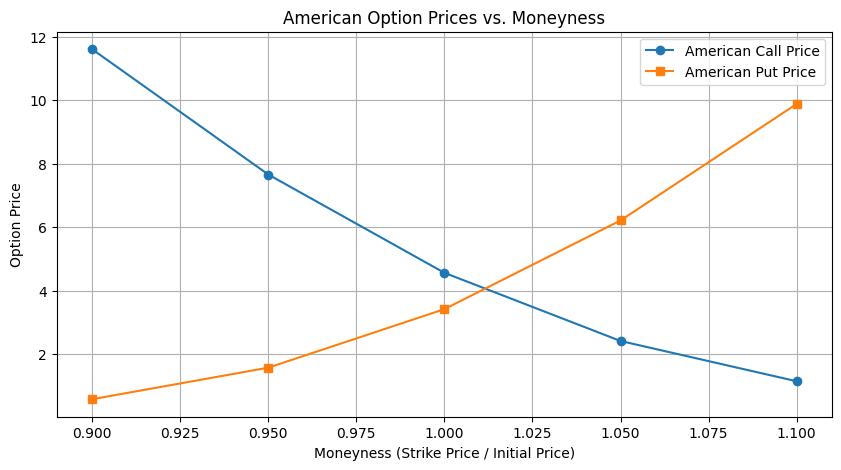

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
S0 = 100  # Initial stock price
r = 0.05  # Risk-free rate
sigma = 0.20  # Volatility
T = 3 / 12  # Time to maturity (in years)
N = 63  # Reduce number of time steps to 63 (daily for 3 months)
M = 10000  # Reduce number of simulations to 10,000 for faster execution
dt = T / N  # Time step size

def monte_carlo_american_call(S, K, T, r, sigma, simulations=M, steps=N):
    dt = T / steps
    np.random.seed(42)
    payoff = np.zeros(simulations)
    for i in range(simulations):
        path = S * np.exp(np.cumsum((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(steps)))
        payoff[i] = max(path[-1] - K, 0)
    return np.exp(-r * T) * np.mean(payoff)

def monte_carlo_american_put(S, K, T, r, sigma, simulations=M, steps=N):
    dt = T / steps
    np.random.seed(42)
    payoff = np.zeros(simulations)
    for i in range(simulations):
        path = S * np.exp(np.cumsum((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(steps)))
        payoff[i] = max(K - path[-1], 0)
    return np.exp(-r * T) * np.mean(payoff)

# Define five different moneyness levels
moneyness_levels = [0.90, 0.95, 1.00, 1.05, 1.10]
call_prices = []
put_prices = []

for m in moneyness_levels:
    K_m = S0 * m
    call_prices.append(monte_carlo_american_call(S0, K_m, T, r, sigma))
    put_prices.append(monte_carlo_american_put(S0, K_m, T, r, sigma))

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(moneyness_levels, call_prices, label="American Call Price", marker='o')
plt.plot(moneyness_levels, put_prices, label="American Put Price", marker='s')
plt.xlabel("Moneyness (Strike Price / Initial Price)")
plt.ylabel("Option Price")
plt.title("American Option Prices vs. Moneyness")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Step 3: Hedging Under Black-Scholes for European Options
import numpy as np  # Import numpy and assign it the alias 'np'
import scipy.stats as si  # Import scipy.stats and assign it the alias 'si'

# Given Parameters
S0 = 100  # Initial stock price
T = 3 / 12  # 3 months maturity (in years)
r = 0.05  # Risk-free rate (5% annually)
sigma = 0.2  # Volatility (20% annually)

# Strike Prices for Different Moneyness Levels
K_call = 1.1 * S0  # 110% moneyness for Call option
K_put = 0.95 * S0  # 95% moneyness for Put option

# Function for Black-Scholes pricing
def black_scholes_price(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        return S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)

# Compute Option Prices
bs_call_110 = black_scholes_price(S0, K_call, T, r, sigma, "call")
bs_put_95 = black_scholes_price(S0, K_put, T, r, sigma, "put")

# Function for Black-Scholes Delta
def black_scholes_delta(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

    if option_type == "call":
        return si.norm.cdf(d1)
    elif option_type == "put":
        return si.norm.cdf(d1) - 1

# Compute Deltas
delta_call_110 = black_scholes_delta(S0, K_call, T, r, sigma, "call")
delta_put_95 = black_scholes_delta(S0, K_put, T, r, sigma, "put")

# Portfolio 1: Buying Both Call and Put
portfolio_1_delta = delta_call_110 + delta_put_95

# Portfolio 2: Buying the Call and Selling the Put
portfolio_2_delta = delta_call_110 - delta_put_95

# Display Results
results = {
    "European Call Price (110% Moneyness)": bs_call_110,
    "European Put Price (95% Moneyness)": bs_put_95,
    "Call Delta (110% Moneyness)": delta_call_110,
    "Put Delta (95% Moneyness)": delta_put_95,
    "Portfolio 1 Delta (Buy Call & Put)": portfolio_1_delta,
    "Portfolio 2 Delta (Buy Call, Sell Put)": portfolio_2_delta,
}

results

{'European Call Price (110% Moneyness)': 1.1911316636130636,
 'European Put Price (95% Moneyness)': 1.5342604771222845,
 'Call Delta (110% Moneyness)': 0.21825450140567343,
 'Put Delta (95% Moneyness)': -0.24574750481397367,
 'Portfolio 1 Delta (Buy Call & Put)': -0.027493003408300243,
 'Portfolio 2 Delta (Buy Call, Sell Put)': 0.4640020062196471}

# STEP 3.7 CODE

In [ ]:
import numpy as np
import scipy.stats as si

# Parameters
S0 = 100       # Initial stock price
T = 3 / 12     # Maturity: 3 months
r = 0.05       # Risk-free rate (annual)
sigma = 0.2    # Volatility (annual)

# Strike Prices
K_call = 1.1 * S0   # 110% moneyness Call
K_put = 0.95 * S0   # 95% moneyness Put

# Black-Scholes pricing function
def black_scholes_price(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        return S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)

# Black-Scholes Delta function
def black_scholes_delta(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

    if option_type == "call":
        return si.norm.cdf(d1)
    elif option_type == "put":
        return si.norm.cdf(d1) - 1

# Calculations
call_price = black_scholes_price(S0, K_call, T, r, sigma, "call")
put_price = black_scholes_price(S0, K_put, T, r, sigma, "put")

call_delta = black_scholes_delta(S0, K_call, T, r, sigma, "call")
put_delta = black_scholes_delta(S0, K_put, T, r, sigma, "put")

# Portfolio Deltas
portfolio1_delta = call_delta + put_delta
portfolio2_delta = call_delta - put_delta

# Results
results = {
    "European Call Price (110% Moneyness)": round(call_price, 2),
    "European Put Price (95% Moneyness)": round(put_price, 2),
    "Call Delta (110% Moneyness)": round(call_delta, 3),
    "Put Delta (95% Moneyness)": round(put_delta, 3),
    "Portfolio 1 Delta (Buy Call & Put)": round(portfolio1_delta, 3),
    "Portfolio 2 Delta (Buy Call, Sell Put)": round(portfolio2_delta, 3)
}

for key, value in results.items():
    print(f"{key}: {value}")


European Call Price (110% Moneyness): 1.19
European Put Price (95% Moneyness): 1.53
Call Delta (110% Moneyness): 0.218
Put Delta (95% Moneyness): -0.246
Portfolio 1 Delta (Buy Call & Put): -0.027
Portfolio 2 Delta (Buy Call, Sell Put): 0.464


## Step 3.8 code

In [ ]:
S0 = 120
K = 120
barrier = 141
r = 0.06
sigma = 0.30
T = 8 / 12
N = int(np.round(T * 252))
dt = T / N
M = 100000

np.random.seed(42)

Z = np.random.normal(size=(M, N))

S = np.zeros((M, N + 1))
S[:, 0] = S0

for t in range(N):
    S[:, t + 1] = S[:, t] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t])

max_S = np.max(S, axis=1)
# the only difference to vanilla European: payoff becomes zero if we go over the barrier
payoff = np.where(max_S >= barrier, 0, np.maximum(S[:, N] - K, 0))

discount_factor = np.exp(-r * T)
price = np.mean(payoff) * discount_factor
std_err = np.std(payoff) / np.sqrt(M) * discount_factor

print(f"Up-and-Out Call Option Price: {price:.4f}, Standard Error: {std_err:.4f}")

Up-and-Out Call Option Price: 0.7172, Standard Error: 0.0085


#Step3.9

In [ ]:
import numpy as np

# Given parameters
S0 = 120  # Initial stock price
K = 120   # Strike price
barrier = 141  # Barrier level
r = 0.06  # Risk-free rate
sigma = 0.30  # Volatility
T = 8 / 12  # Time to maturity (in years)
N = int(np.round(T * 252))  # Number of time steps
M = 100000  # Number of simulations
dt = T / N  # Time step size

np.random.seed(42)
# Generating Monte Carlo paths
Z = np.random.normal(size=(M, N))
S = np.zeros((M, N + 1))
S[:, 0] = S0

for t in range(N):
    S[:, t + 1] = S[:, t] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t])

max_S = np.max(S, axis=1)

# Computing prices
# Up-and-In Call
payoff_uai = np.where(max_S >= barrier, np.maximum(S[:, -1] - K, 0), 0)
price_uai = np.exp(-r * T) * np.mean(payoff_uai)

# Vanilla European Call (No barrier)
payoff_vanilla = np.maximum(S[:, -1] - K, 0)
price_vanilla = np.exp(-r * T) * np.mean(payoff_vanilla)


price_uao = 0.71

# Print results
print(f"Up-and-In Call Option Price: {price_uai:.4f}")
print(f"Up-and-Out Call Option Price: {price_uao:.4f}")
print(f"Vanilla European Call Option Price: {price_vanilla:.4f}")

Up-and-In Call Option Price: 13.2131
Up-and-Out Call Option Price: 0.7100
Vanilla European Call Option Price: 13.9303
